In [ ]:
'''

Análisis de otros factores internos: ¿EL SEXO DEL ANIMAL INFLUYE?

'''

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")

In [3]:
df_agility = pd.read_csv("./data/6_DATA_AGILITY.csv")

In [4]:
df_agility.head()

,indice,Index_data,Fecha,License,Breed,Gender,Hight_cm,Classification,Speed m/s,Time (s),Faults,Refusals,Competition,Location,Roof,Floor,Eliminados,Fecha_Competición,Pista
0,0,0,Sabado 6 abril,2023280386PS88000015,Continental Toy Spaniel,Male,24.5,-,0.00,0.00,100,100,Pataplán 6 y 7 Abril - Liga CASTILLA LA MANCHA,Cuenca / Spain,Outdoor,Sand,ELIM,Apr 6 - 7,Jumping
1,1,0,Sabado 6 abril,2022160138RS70000004,Shetland Sheepdog,Female,31.0,1º,3.59,42.03,1,1,Pataplán 6 y 7 Abril - Liga CASTILLA LA MANCHA,Cuenca / Spain,Outdoor,Sand,V_GOOD,Apr 6 - 7,Jumping
2,2,0,Sabado 6 abril,2022160138RS70000004,Shetland Sheepdog,Female,31.0,-,0.00,0.00,100,100,Pataplán 6 y 7 Abril - Liga CASTILLA LA MANCHA,Cuenca / Spain,Outdoor,Sand,ELIM,Apr 6 - 7,Agility
3,3,0,Sabado 6 abril,2018160135RS70000001,Border Collie,Female,50.0,-,0.00,0.00,100,100,Pataplán 6 y 7 Abril - Liga CASTILLA LA MANCHA,Cuenca / Spain,Outdoor,Sand,ELIM,Apr 6 - 7,Jumping
4,4,0,Sabado 6 abril,2018160135RS70000001,Border Collie,Female,50.0,1º,3.32,59.59,0,0,Pataplán 6 y 7 Abril - Liga CASTILLA LA MANCHA,Cuenca / Spain,Outdoor,Sand,EXC_0,Apr 6 - 7,Agility


In [5]:
#ANALISIS factores internos: Gender / Hight_cm / speed / Time / Faltas / Refus / Pista

In [6]:
elim_x_gender = df_agility.groupby("Gender")["Eliminados"].value_counts()
elim_x_gender

Gender  Eliminados
Female  EXC_0         7741
        ELIM          5727
        EXC           4031
        V_GOOD        2426
        GOOD           424
        NP             224
Male    EXC_0         4231
        ELIM          3330
        EXC           2441
        V_GOOD        1629
        GOOD           276
        NP             131
Name: count, dtype: int64

In [7]:
dic_gender = {
    "Gender":[],
    "Qualificación":[],
    "Número_perros":[]
}

for i,a in elim_x_gender.items():
    #print(i,a)
    if i == ('Female', 'EXC_0'):
        dic_gender["Gender"].append("Female")
        dic_gender["Qualificación"].append("EXC_0")
        dic_gender["Número_perros"].append(a)
    if i == ('Female', 'ELIM'):
        dic_gender["Gender"].append("Female")
        dic_gender["Qualificación"].append("ELIM")
        dic_gender["Número_perros"].append(a)
    if i == ('Male', 'EXC_0'):
        dic_gender["Gender"].append("Male")
        dic_gender["Qualificación"].append("EXC_0")
        dic_gender["Número_perros"].append(a)
    if i == ('Male', 'ELIM'):
        dic_gender["Gender"].append("Male")
        dic_gender["Qualificación"].append("ELIM")
        dic_gender["Número_perros"].append(a)

df_gender = pd.DataFrame(dic_gender)
df_gender

,Gender,Qualificación,Número_perros
0,Female,EXC_0,7741
1,Female,ELIM,5727
2,Male,EXC_0,4231
3,Male,ELIM,3330


In [8]:
# estoy cansada.... creo que lo dejo por hoy :') no me salen ya mas bucles....

a = round(7741 / 13468 * 100, 2)
b = round(5727 / 13468 * 100, 2)
c = round(4231 / 7561 * 100, 2)
d = round(3330 / 7561 * 100, 2)

e = round(7741 / 21029 * 100, 2)
f = round(5727 / 21029 * 100, 2)
g = round(4231 / 21029 * 100, 2)
h = round(3330 / 21029 * 100, 2)

list_relativo = [a, b, c, d]
list_absoluto = [e, f, g, h]


In [9]:
df_gender.groupby("Gender")["Número_perros"].sum()

Gender
Female    13468
Male       7561
Name: Número_perros, dtype: int64

In [10]:
df_gender["Número_perros"].sum()

21029

In [11]:
df_gender["%relativo"] = list_relativo
df_gender["%absoluto"] = list_absoluto
df_gender

,Gender,Qualificación,Número_perros,%relativo,%absoluto
0,Female,EXC_0,7741,57.48,36.81
1,Female,ELIM,5727,42.52,27.23
2,Male,EXC_0,4231,55.96,20.12
3,Male,ELIM,3330,44.04,15.84


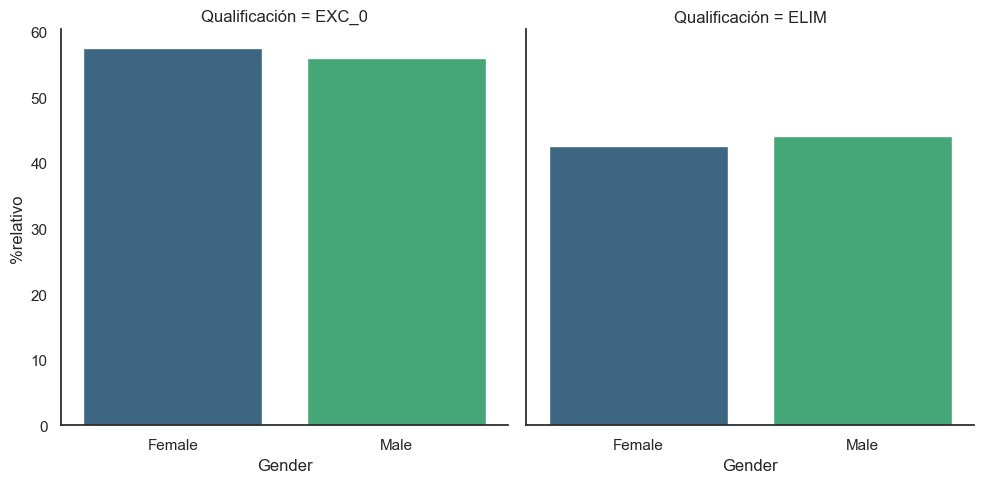

In [19]:
sns.catplot(x="Gender",
            y = "%relativo",
            col="Qualificación",
            hue = "Gender",
            kind="bar", 
            palette="viridis",
            data=df_gender);

plt.savefig('./img/fig_por_sexo.png', bbox_inches='tight')